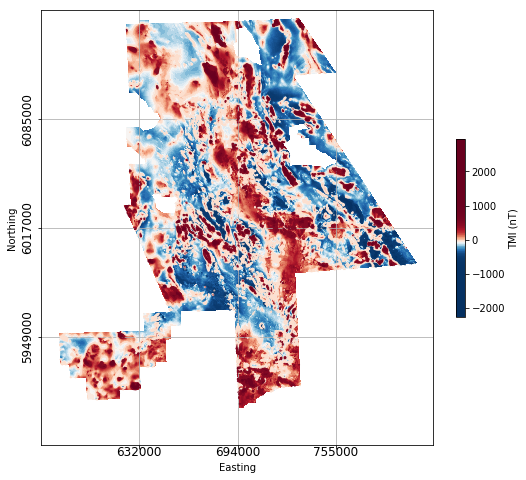

In [2]:
## Load all libraries and setup the synthetic problem
from library.Mag import Mag, ProblemSetter, MathUtils, Simulator, DataIO
import numpy as np
from SimPEG import PF, Utils, Mesh, Maps
from SimPEG import Utils
from SimPEG.Utils import mkvc
import SimPEG.PF as PF
import scipy as sp
import re
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Load data in grid format
# workDir =r"C:\Dianne\Data\Public\GBC_Search\Phase2\Mag\AnomalousMagneticField_updatedApr17"
workDir = r"C:\Dianne\Data\Public\GBC_Search\Phase2\Mag\AnomalousMagneticField_updatedApr17"
fName = '\MAG_UTM09.grd'

dataGrid = DataIO.loadGRDFile(workDir+fName)

# 2.2.1.	Magnetic Data Response and Visualization#


## Magnetic response over the Search Phase II project area

Gridded residual magnetic data from Geoscience BC's Search Phase II project (Anomalous Magnetic Field) were downloaded from Geoscience BC's website. The magnetic data is interpolated onto a 50 $m^2$ grid. The data are shown using coordinate system NAD 83 UTM Zone 9. 


<img src="./images/SearchQuestII.png">


## Define a project area

Let's choose a subset of data to view more closely. The map on the left shows the full Search Phase II magnetic dataset with a movable 'window' outlined in black, and the map on the right shows just the data encompassed by the window. The window can be resized and moved anywhere over the data using the slider bars. The default window is 40 km x 40 km in size, a size typical of surveys flown to explore magnetic responses at the exploration property, or district scale. 

In [3]:
selection = ProblemSetter.setDataExtentWidget(dataGrid)
display(selection)

interactive(children=(FloatSlider(value=669500.0, continuous_update=False, description='East', max=816075.0, min=571025.0, step=500.0), FloatSlider(value=6069500.0, continuous_update=False, description='North', max=6152775.0, min=5881025.0, step=10.0), FloatSlider(value=40000.0, continuous_update=False, description='Width', max=100000.0, min=1000.0, step=1000.0), FloatSlider(value=40000.0, continuous_update=False, description='Height', max=100000.0, min=1000.0, step=1000.0), Output()), _dom_classes=('widget-interact',))

## Profile the data
We can then view a profile through the magnetic data. Use the slider bars to change the location, orientation, and length of the profile. The sampling rate along the profile can also be changed.  

In [4]:
param = Simulator.ViewMagSurveyWidget(selection.result)
display(param)

interactive(children=(FloatSlider(value=669500.0, continuous_update=False, description='East', max=709500.0, min=629500.0, step=10.0), FloatSlider(value=6069500.0, continuous_update=False, description='North', max=6109500.0, min=6029500.0, step=10.0), FloatSlider(value=90.0, continuous_update=False, description='Azimuth', max=180.0, step=5.0), FloatSlider(value=28284.2712474619, continuous_update=False, description='Length', max=56568.5424949238, min=20.0, step=20.0), BoundedFloatText(value=100.0, description='Sampling', max=1000.0, min=10.0, step=5.0), Output()), _dom_classes=('widget-interact',))

## Data visualization and image enhancement

As in the synthetic model example, presented previously, we can explore different ways of presenting and enhancing the magnetic image to find optimal visual parameters for interpreting features of interest.  

Use the slider bars below to change the direction (SunAzimuth) and angle (SunAngle) of sun shading, to vary color transparency (ColorTransp) and hillshade transparency (HSTransp), change the vertical scale (vScale) and to manipulate magnetic contours lines (MagContour).
   
Again, we have the option to change the color map, or the color stretch. 

Try different combinations of sun-shading and color settings to see how the image and visibilty of different features is affected.


In [5]:
view = Simulator.dataHillsideWidget(selection.result)
display(view)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='SunAzimuth', max=360.0, step=5.0), FloatSlider(value=15.0, continuous_update=False, description='SunAngle', max=90.0, step=5.0), FloatSlider(value=0.3, continuous_update=False, description='ColorTransp', max=1.0), FloatSlider(value=1.0, continuous_update=False, description='HSTransp', max=1.0), FloatSlider(value=1.0, continuous_update=False, description='vScale', max=4.0, min=1.0, step=1.0), IntSlider(value=50, continuous_update=False, description='Contours', min=10, step=10), Dropdown(description='ColorMap', index=3, options=('viridis', 'plasma', 'magma', 'RdBu_r', 'Greys_r', 'jet', 'hsv', 'rainbow', 'pink', 'bone', 'hsv', 'nipy_spectral'), value='RdBu_r'), FloatRangeSlider(value=(-778.33984375, 1930.2952880859375), continuous_update=False, description='Color Range', max=1930.2952880859375, min=-778.33984375, readout_format='.1f', step=1.0), Dropdown(description='Color Normalization', index=1, options=('Linear', 'HistEqualized'), value='HistEqualized'), ToggleButton(value=False, description='Export geoTiff', icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))